# Final Project
## Machine Learning: Prediction on bike sharing demand

In [199]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from tensorflow.keras import layers

### Importing the merged dataset

In [200]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'Joint_dataframe.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [201]:
dataset = dataset.drop(["index"], axis = 1)
dataset.head()

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,42,31,2,11.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,51,39,3,12.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,44,37,4,7.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,48,38,5,10.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.156876,51.4931,-0.156876,51.4931


KeyboardInterrupt: 

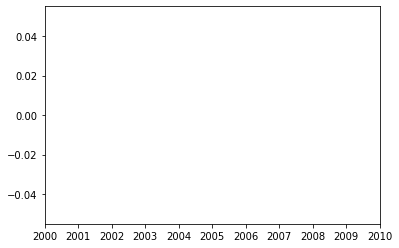

In [4]:
# Finding Outliers 

ax = sns.lineplot(x = "timestamp", y = "Total", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

KeyboardInterrupt: 

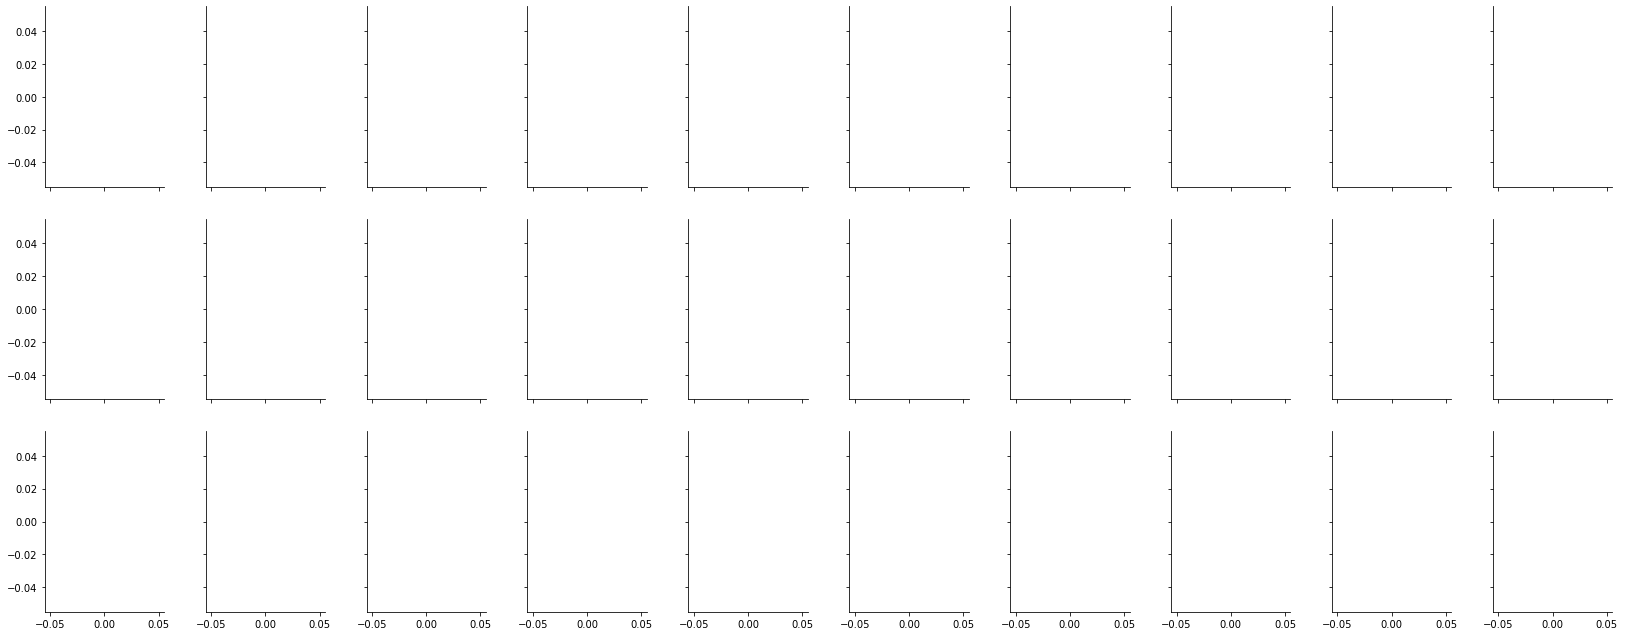

In [5]:
sns.relplot(x = "Station Id", y = "In", hue = "is_weekend",
            col = "date", col_wrap = 10,
            height = 3, aspect = .75, linewidth = 2.5,
            kind = "line", data = dataset);

### Data clearing

In [68]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [202]:
# Finding invalid Station Id
station = []
station = location['Station.Id'].values.tolist()

def find_missing(list):
    return [i for x, y in zip(station, station[1:]) 
        for i in range(x + 1, y) if y - x > 1]

missing = find_missing(station)
missing

[35,
 137,
 179,
 198,
 205,
 241,
 285,
 304,
 342,
 346,
 369,
 385,
 391,
 406,
 407,
 413,
 414,
 415,
 416,
 417,
 418,
 422,
 429,
 434,
 438,
 493,
 555,
 567,
 575,
 582,
 585,
 791,
 822,
 823,
 824,
 825,
 835,
 836,
 837]

In [203]:
# delete values if Station Id is NOT inside the list 'missing'
dataset = dataset[~dataset['Station Id'].isin(missing)]

In [204]:
dataset

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,42,31,2,11.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,51,39,3,12.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,44,37,4,7.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,48,38,5,10.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.156876,51.4931,-0.156876,51.4931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-08,1,0,0,0.0,0.0,24.0,19.250000,19.229167,57.145833,15.562500,8.0,0.000000,0.0000,0.000000,0.0000
2016-05-08,1,0,0,0.0,0.0,24.0,19.250000,19.229167,57.145833,15.562500,8.0,0.000000,0.0000,0.000000,0.0000
2016-05-09,1,0,0,0.0,0.0,0.0,17.708333,17.645833,65.729167,16.145833,9.0,0.000000,0.0000,0.000000,0.0000


In [186]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [205]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [206]:
obj.get_group(81).head()

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,38,32,81,6.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.141327,51.5203,-0.141327,51.5203
2016-04-02,31,24,81,7.0,0.0,24.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.141327,51.5203,-0.141327,51.5203
2016-04-03,22,25,81,-3.0,0.0,24.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.141327,51.5203,-0.141327,51.5203
2016-04-04,48,41,81,7.0,0.0,0.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.141327,51.5203,-0.141327,51.5203
2016-04-05,18,45,81,-27.0,0.0,0.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.141327,51.5203,-0.141327,51.5203


## Make sure to sort this error with strange STATION ID = 79, stop at 80
## clearning the data needed - either delete all the rows with invalid station

#### Having to find the missing value depending on the Station Id and to compare it for adding dataframe might not suitable. As there are different other factors (empty string, null value) that can contributed to missing value

In [207]:
# add datasets to list
index = 1
df = []
dropped = [35,79,80]

# for now, until 30
for index in range(len(dataset['Station Id'])):
    if (index in dropped): # if station id is invalid, carry on to next station. 
        index = index + 1
    df.append(obj.get_group(index))
    
df

KeyError: 80

## Visualisation of the map

### think how you would do for different days

In [190]:
#Function to change colors

def color_change(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')

In [209]:
# Create base map

cap = dataset['In']
date = dataset.index
lat = dataset['latitude']
lon = dataset['longitude']

# make latitude and longitude into a list of tuples
loc = dataset[['latitude', 'longitude']].copy()
tuples = loc.to_records(index=False)
locations = list(tuples)

London = [51.506949, -0.122876]
map = folium.Map(location = London,
                 zoom_start = 12, 
                 tiles = "CartoDB positron")
marker_cluster = MarkerCluster(locations).add_to(map)

# Plot markers

for _lat, _lon, _cap, _date in zip(lat, lon, cap, date):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 9, 
                        popup = "("+ str(_cap) +")" + str(_date),
                        fill_color = color_change(_cap), 
                        color = "gray", 
                        fill_opacity = 0.9).add_to(marker_cluster)

In [ ]:
#map

## Neural network

In [125]:
# create a model
# and call data in loop for training

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
# split into input (train) and output (test) variables for each of the datasets

for i in range(30): # meant to be len(dataset['Station Id'])
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size
    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]
    print(len(train),len(test))
    # fit the model
    #model.fit(train, test, epochs=10)

18 5
24 6
24 6
24 6
24 6
24 6
24 6
24 6
24 6
23 6
24 6
24 6
24 7
21 6
24 7
24 6
24 6
24 7
24 6
24 6
24 6
24 6
24 7
24 7
24 6
24 7
24 6
24 6
24 6
24 6


In [ ]:
for i in range(30): # meant to be len(dataset['Station Id'])
    model.fit(X_train, y_train, epochs=10)

## LSTM (Long short-term memory neural networks)

In [128]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
print(len(train),len(test))

18210 4553


#### caling continuous data optimizes machine learning model performance. I scaled temperature, humidity and windspeed to have mean 0 and standard deviation 1. This process optimizes machine learning model's performance and model converges quicker.

In [7]:
from sklearn.preprocessing import StandardScaler
feature_transformer = StandardScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
feature_transformer = feature_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = feature_transformer.transform(train[feature_columns].to_numpy())
test.loc[:, feature_columns] = feature_transformer.transform(test[feature_columns].to_numpy())

Total_transformer = StandardScaler()
Total_transformer = Total_transformer.fit(train[['In']])
train['In'] = Total_transformer.transform(train[['In']])
test['In'] = Total_transformer.transform(test[['In']])

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_35960/4077722669.py:10: SettingWithCopyWarning: 
A va

In [8]:
train.head()

,index,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,,
2016-04-01,0,-0.511167,22,1,-5.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,1,0.237227,31,2,11.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,2,0.506649,39,3,12.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,3,0.297099,37,4,7.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,4,0.416842,38,5,10.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.156876,51.4931,-0.156876,51.4931


In [9]:
test.head()

,index,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,,
2016-04-25,18210,-0.361488,21,169,1.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.165164,51.5147,-0.165164,51.5147
2016-04-25,18211,0.656328,33,170,23.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.108068,51.5278,-0.108068,51.5278
2016-04-25,18212,8.260015,21,171,289.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.186754,51.4916,-0.186754,51.4916
2016-04-25,18213,-0.211809,19,172,8.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.173716,51.4912,-0.173716,51.4912
2016-04-25,18214,-0.062130,44,173,-12.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.113001,51.5049,-0.113001,51.5049


In [11]:
## Create X_train, y_train, X_test and y_test

""" 
Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence, Xs: Numpy array of sequences of time-series data
        * output, ys: Numpy array of output i.e. next value for respective sequence
    
"""

def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        #if (dataset['Station Id'][i] == 1):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

time_steps = 7
X_train, y_train = createDataset(train, train.Total, time_steps)
X_test, y_test = createDataset(test, test.Total, time_steps)
print(X_train.shape, y_train.shape)

(18203, 7, 16) (18203,)


##### Here I define LSTM model as our machine learning model for predicting bike share demand. Because LSTMS have the ability to capture the sequence in a data, hence I used LSTM. Dropout rate of 20% is used to prevent overfitting. Output is one unit as we are predicting one value of "cnt" on basis of input parameters. Since data is continuous, mean square error loss is used.

In [12]:
# Predicting Demand 

import keras

model = keras.Sequential()
model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model

2022-03-07 13:53:40.902564: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### do something to decrease the loss / error
### plot a graph ( daily graph as above ) with actual and predicted values

In [15]:
# Train the model

history = model.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/5
512/512 [==============================] - 7s 13ms/step - loss: 1845.9645 - val_loss: 1366.7593
Epoch 2/5
512/512 [==============================] - 6s 12ms/step - loss: 1847.0032 - val_loss: 1366.6541
Epoch 3/5
512/512 [==============================] - 7s 13ms/step - loss: 1845.7823 - val_loss: 1366.8062
Epoch 4/5
512/512 [==============================] - 6s 12ms/step - loss: 1845.8131 - val_loss: 1366.6355
Epoch 5/5
512/512 [==============================] - 6s 13ms/step - loss: 1846.3973 - val_loss: 1366.7729


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 148,737
Trainable params: 148,737
Non-trainable params: 0
_________________________________________________________________


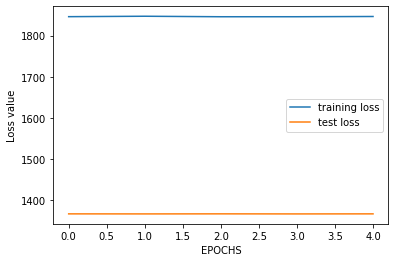

In [17]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [18]:
y_pred = model.predict(X_test)
y_pred

array([[0.23243262],
       [0.23243262],
       [0.23243262],
       ...,
       [0.23243262],
       [0.23243262],
       [0.23243262]], dtype=float32)

In [19]:
# Inverse transformed data
# To get original unscaled values

y_train_inv = Total_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = Total_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = Total_transformer.inverse_transform(y_pred.reshape(1, -1))

y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

print(y_train_inv)
print(y_test_inv)
print(y_pred_inv)

[  100.8851475    267.90938362   167.69484195 ...  -132.94878307
 -1769.78629708   301.31423084]
[ 1403.67418925 -1736.38144985  -366.78271365 ...    34.07545305
    34.07545305    34.07545305]
[41.83983 41.83983 41.83983 ... 41.83983 41.83983 41.83983]


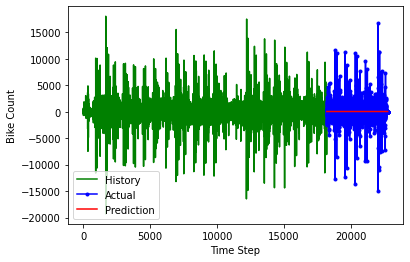

In [20]:
#Plot history, actual and predicted value

plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

KeyboardInterrupt: 

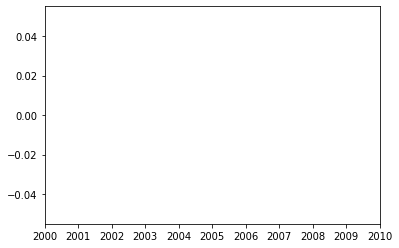

In [38]:
# before modelling 

ax = sns.lineplot(x = "timestamp", y = "In", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

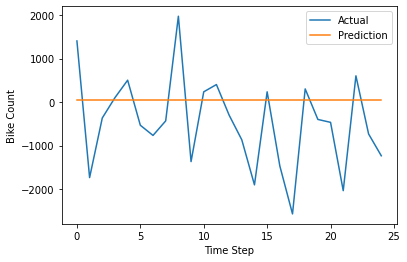

In [21]:
# Plot actual and predicted value

plt.plot(y_test_inv[:25,], label="Actual")
plt.plot(y_pred_inv[:25,], label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();